## Load the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the data

## Problem Statement: Based on other factors like actors, actress decide whether the movie can get an Oscar

In [2]:
data = pd.read_csv('Movie_classification.csv')
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [3]:
data.shape

(506, 19)

## Data Explorations

In [4]:
data['Start_Tech_Oscar'].value_counts()

1    276
0    230
Name: Start_Tech_Oscar, dtype: int64

<Axes: xlabel='Start_Tech_Oscar', ylabel='count'>

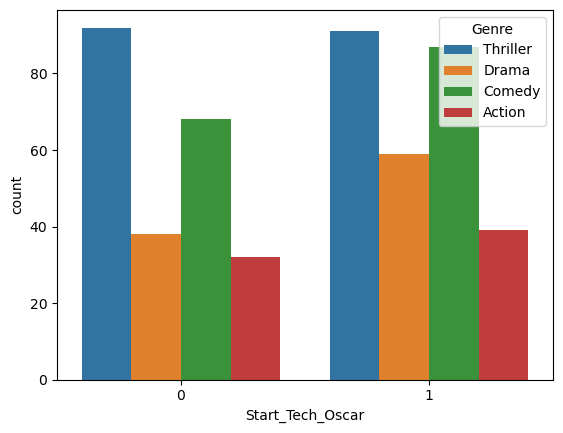

In [5]:
sns.countplot(x = data['Start_Tech_Oscar'], hue = data['Genre'])

<Axes: xlabel='Start_Tech_Oscar', ylabel='count'>

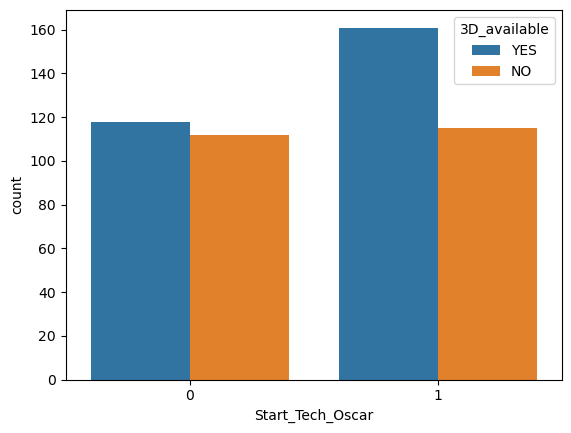

In [6]:
sns.countplot(x = data['Start_Tech_Oscar'], hue = data['3D_available'])

In [7]:
data.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [8]:
data['Time_taken'] = data['Time_taken'].fillna(data['Time_taken'].mode()[0])
data.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Start_Tech_Oscar       0
dtype: int64

## 

In [9]:
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


cols = ['Budget', 'Trailer_views', 'Collection']

In [10]:
data.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,156.489565,260.832095,39.181818,545.043478,45057.707510,0.545455
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.459008,104.779133,12.513697,106.332889,18364.351764,0.498422
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,129.570000,223.796000,28.000000,465.000000,34050.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,158.980000,254.400000,39.000000,535.500000,42400.000000,1.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.520000,283.416000,50.000000,614.750000,50000.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000,1.000000


In [11]:
cols = ['Budget', 'Trailer_views', 'Collection']
cols

['Budget', 'Trailer_views', 'Collection']

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler()

In [13]:
data[cols] = ss.fit_transform(data[cols])
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,0.413672,138.7,7.825,8.095,7.910,7.995,7.94,1.125733,YES,109.60,223.840,Thriller,23,494,0.160376,1
1,20.5462,69.14,0.531,0.194274,152.4,7.505,7.650,7.440,7.470,7.44,0.641896,NO,146.64,243.456,Drama,42,462,-0.101258,0
2,20.5458,69.14,0.531,1.282714,134.6,7.485,7.570,7.495,7.515,7.44,1.411631,NO,147.88,2022.400,Comedy,38,458,1.326830,1
3,20.6474,59.36,0.542,1.016303,119.3,6.895,7.035,6.920,7.020,8.26,0.964686,YES,185.36,225.344,Drama,45,472,1.185112,1
4,21.3810,59.36,0.542,1.228577,127.7,6.920,7.070,6.815,7.070,8.26,1.185007,NO,176.48,225.792,Drama,55,395,1.490352,1


## Feature Encoding

In [14]:
dic = {'NO' : 0, 'YES' : 1}

data['3D_available'] = data['3D_available'].replace(dic)
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,0.413672,138.7,7.825,8.095,7.910,7.995,7.94,1.125733,1,109.60,223.840,Thriller,23,494,0.160376,1
1,20.5462,69.14,0.531,0.194274,152.4,7.505,7.650,7.440,7.470,7.44,0.641896,0,146.64,243.456,Drama,42,462,-0.101258,0
2,20.5458,69.14,0.531,1.282714,134.6,7.485,7.570,7.495,7.515,7.44,1.411631,0,147.88,2022.400,Comedy,38,458,1.326830,1
3,20.6474,59.36,0.542,1.016303,119.3,6.895,7.035,6.920,7.020,8.26,0.964686,1,185.36,225.344,Drama,45,472,1.185112,1
4,21.3810,59.36,0.542,1.228577,127.7,6.920,7.070,6.815,7.070,8.26,1.185007,0,176.48,225.792,Drama,55,395,1.490352,1


In [15]:
data_ohe = pd.get_dummies(data['Genre'])
data_ohe

,Action,Comedy,Drama,Thriller
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
501,1,0,0,0
502,1,0,0,0
503,0,1,0,0
504,0,1,0,0


In [16]:
data = pd.concat([data, data_ohe], axis = 1)
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,Action,Comedy,Drama,Thriller
0,20.1264,59.62,0.462,0.413672,138.7,7.825,8.095,7.910,7.995,7.94,...,223.840,Thriller,23,494,0.160376,1,0,0,0,1
1,20.5462,69.14,0.531,0.194274,152.4,7.505,7.650,7.440,7.470,7.44,...,243.456,Drama,42,462,-0.101258,0,0,0,1,0
2,20.5458,69.14,0.531,1.282714,134.6,7.485,7.570,7.495,7.515,7.44,...,2022.400,Comedy,38,458,1.326830,1,0,1,0,0
3,20.6474,59.36,0.542,1.016303,119.3,6.895,7.035,6.920,7.020,8.26,...,225.344,Drama,45,472,1.185112,1,0,0,1,0
4,21.3810,59.36,0.542,1.228577,127.7,6.920,7.070,6.815,7.070,8.26,...,225.792,Drama,55,395,1.490352,1,0,0,1,0


In [17]:
data = data.drop('Genre', axis = 1)
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,Action,Comedy,Drama,Thriller
0,20.1264,59.62,0.462,0.413672,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,0.160376,1,0,0,0,1
1,20.5462,69.14,0.531,0.194274,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,-0.101258,0,0,0,1,0
2,20.5458,69.14,0.531,1.282714,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,1.326830,1,0,1,0,0
3,20.6474,59.36,0.542,1.016303,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,1.185112,1,0,0,1,0
4,21.3810,59.36,0.542,1.228577,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,1.490352,1,0,0,1,0


## Seperate X and y

In [19]:
X = data.drop('Start_Tech_Oscar', axis = 1)
y = data['Start_Tech_Oscar']

## Split the data into train_test_set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Apply DTC on the train set

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [23]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

## Perform predictions on X_test

In [24]:
y_pred = dtc.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1],
      dtype=int64)

In [25]:
X_test

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,3D_available,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Action,Comedy,Drama,Thriller
173,21.8356,63.10,0.490,0.187151,157.6,8.570,8.715,8.615,8.805,7.68,...,1,197.44,203.776,59,540,0.116770,0,1,0,0
274,21.1288,67.82,0.553,0.674384,106.4,7.900,8.010,7.810,8.120,8.48,...,0,212.96,245.184,30,426,1.076097,0,0,0,1
491,22.1148,110.48,0.391,-0.429726,172.3,9.020,9.155,8.970,9.120,6.98,...,0,141.44,282.176,47,563,-0.973374,0,1,0,0
72,21.8328,76.62,0.587,-0.312904,81.3,7.270,7.520,7.195,7.440,7.16,...,0,117.12,203.648,20,361,0.029559,0,0,0,1
452,121.8034,91.20,0.287,0.017617,165.3,8.760,8.870,8.815,8.820,7.96,...,0,134.44,302.576,21,646,-0.700838,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,214.4836,91.20,0.260,0.172905,170.7,8.835,9.015,8.920,9.095,6.96,...,1,184.84,302.736,58,775,-0.591823,1,0,0,0
23,39.7686,71.28,0.462,-0.671918,173.5,7.825,8.010,7.935,8.040,7.80,...,1,149.80,262.320,29,527,-0.875261,0,0,1,0
225,30.5386,67.40,0.496,3.476688,156.5,8.435,8.695,8.525,8.560,7.52,...,1,150.00,268.000,20,570,2.994751,0,0,0,1
433,131.6214,91.20,0.287,0.215644,161.4,8.830,8.885,8.800,8.850,7.96,...,0,123.72,202.288,46,615,-0.897064,1,0,0,0


## check accuracy

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.5592105263157895

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtc, X, y, cv = 10)

array([0.52941176, 0.47058824, 0.47058824, 0.58823529, 0.52941176,
       0.66666667, 0.68      , 0.68      , 0.62      , 0.58      ])

## using Gini index algorithm the highest accuracy achieved is 68%

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc

DecisionTreeClassifier(criterion='entropy')

In [31]:
cross_val_score(dtc,X,y,cv = 10)

array([0.49019608, 0.52941176, 0.35294118, 0.62745098, 0.58823529,
       0.64705882, 0.56      , 0.6       , 0.58      , 0.46      ])

### DTC with gini index fits best on the data

In [44]:
dtc_md = DecisionTreeClassifier(max_depth = 20)
dtc_md

DecisionTreeClassifier(max_depth=20)

In [46]:
cross_val_score(dtc_md, X, y, cv = 15)

array([0.61764706, 0.41176471, 0.52941176, 0.29411765, 0.5       ,
       0.44117647, 0.44117647, 0.52941176, 0.64705882, 0.52941176,
       0.76470588, 0.60606061, 0.57575758, 0.54545455, 0.39393939])

## Use gridsearchcv for finding best hyperparameter pairs

In [47]:
data.shape

(506, 22)